In [55]:
using Plots
using Polynomials

theme(:gruvbox_light)

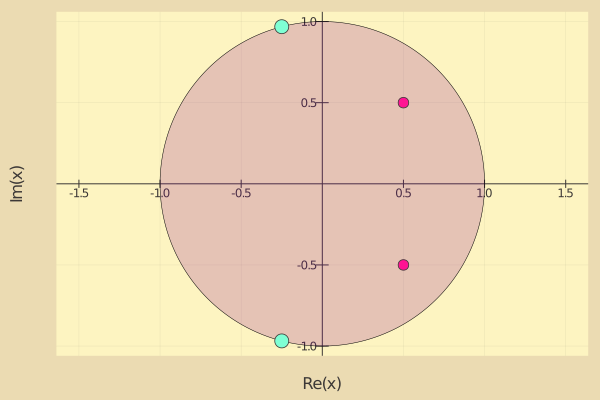

In [141]:
function complex_unit_circle()
    θ = LinRange(0, 2pi, 500)
    exp.(1im * θ)
end

function plot_complex_unit_circle(title="")
    plot(
        complex_unit_circle(),
        seriestype = [:shape],
        linecolor = :black,
        c = :darkmagenta,
        lw = 0.5,
        title = title,
        aspect_ratio = 1,
        legend = false,
        fillalpha = 0.2,
        framestyle=:origin,
    )
end

plt = plot_complex_unit_circle()

# This is the numerator, or feedforward part of the filter coefficients
b = [1, -1, 0.5]

# This is the denominator, or feedback part of the filter coefficients
a = [1, 0.5, 1]

# We need to get our polynomial into the form a0 + a1^x-1 + a2^x-2 ...
zs = roots(LaurentPolynomial(reverse(b), (-length(b) - 1), :x))
poles = roots(LaurentPolynomial(reverse(a), (-length(a) - 1), :y))

# Make sure our roots are in complex form, https://docs.julialang.org/en/v1/manual/conversion-and-promotion/
complex_zs = convert(Array{Complex{Float64}}, zs)
complex_poles = convert(Array{Complex{Float64}}, poles)

scatter!(complex_zs, c=:deeppink, m=6)
scatter!(complex_poles, c=:aquamarine, m=8)

Zeros are the roots of the numerator of a filter's transfer function. Poles are the roots of the denominator. The amazing thing is that these are totally independent, and the poles and zeros of can be placed in the z-domain independently.

Their effect on the input signal is not independent, however. They vie for influence over it. Also it is clumsy to place poles or zeros exactly where you might want them relative to the unit circle. Because conjugate pairs _both_ exert their influence over the input signal, designing the central frequency for the filter to cut or boost is not intuitive. It is also not easy to know how powerful the pole or zeros effect on the input signal will be. For all these reasons, there are more supporting formulas to aide in the design of biquad or other filters designed in the z-domain, which makes them a bit expensive to implement and clumsy to parameterize compared to some anolog-inspired digial filter designs.